# 数据科学

[Jupyter notebook资源](https://github.com/jupyter/jupyter/wiki)

[Exploratory data analysis in Python.](https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)
举了一个简单的例子进行了数据分析，第一步把数据保存在panda的data frame中对数据进行处理。处理后得到用于分析的数据，使用了几种图标来分析数据中各变量关系。
**使用的工具**
pandas numpy seaborn matplotlib

For data integration/cleansing at a smaller scale, the python library_pandas_is often used. For this task, you can have a look at this notebook: https://towardsdatascience.com/data-cleaning-with-python-using-pandas-library-c6f4a68ea8eb  
讲了数据清理的几个步骤  
1.Importing the required libraries.  
2.Getting the data-set from a different source (Kaggle) and displaying the dataset.  
3.Removing the unused or irrelevant columns.  
4.Renaming the column names as per our convenience.  
5.Replacing the value of the rows and make it more meaningful.  

If you want to know more about clustering, have a look at this notebook: https://nbviewer.jupyter.org/github/temporaer/tutorial_ml_gkbionics/blob/master/2%20-%20KMeans.ipynb

And finally, if you want an in-depth notebook on the_iris_dataset, have a look at this: https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis

# 算法总结

### K-Means 算法  

K-means 算法是一种基于划分的聚类方法，用于将数据点分组成预先指定数量的集群。其主要原理是最小化每个点与其所属集群中心点（质心）之间的距离。以下是 K-means 算法的基本原理和步骤：  
<span style="color:green">1.初始化:</span>      
随机选择 k 个数据点作为初始集群中心（质心）。这些点可以是数据集中的随机点，也可以是通过其他方法选定的点。  
<span style="color:green">2.分配步骤:</span>    
对于数据集中的每个点，计算它与所有 k 个中心点的距离。  
将每个点分配给与其最近的中心点所代表的集群。通常使用欧几里得距离来衡量点与中心点之间的距离。  
<span style="color:green">3.更新步骤：</span>     
一旦所有点都被分配到集群，更新每个集群的中心点。新的中心点是该集群中所有点的均值（即平均位置）。  
<span style="color:green">4.迭代：</span>    
重复分配和更新步骤，直到满足停止条件。停止条件可以是中心点不再显著变化，达到预设的迭代次数，或者总体内部距离（每个点到其中心点的距离之和）不再显著减小。    
**目标函数：**    
K-means 算法的目标是最小化集群内部的方差，也就是每个点到其所属集群中心点的平方距离之和。这也被称为集群的“惯性”或“内部方差”。  
**算法特点：**      
速度和可扩展性：K-means 算法通常运行速度快，适用于大型数据集。      
适用性：最适合处理球形集群且集群大小大致相等的数据。     
限制：对噪声和异常值敏感，且由于初始中心点的随机选择，可能导致局部最优解。     
**选择 k 的值：**    
确定合适数量的集群（k 的值）是算法的关键挑战之一。常用方法包括肘部法则和轮廓分数等。
K-means 算法因其简单和效率而广泛应用于各种数据科学和机器学习场景，尽管它有一些局限性，如对初始质心选择敏感，以及处理非球形集群或不同大小集群的能力有限。
肘部法则 (Elbow Method)：这是最常用的方法之一。它涉及到运行 K-means 算法多次，每次使用不同的 k 值，并计算每个 k 值对应的总内部平方和（Within-Cluster Sum of Squares, WCSS）。随着 k 值的增加，WCSS 会减少，因为样本会更接近其相应的质心。
肘部点是 WCSS 图中的一个拐点，即随着 k 增加，WCSS 下降速度显著减慢的点。这个点被视为合适的 k 值。
轮廓分析 (Silhouette Analysis)：轮廓系数是衡量样本距离其自身集群中心的距离以及最近的其他集群中心的距离的指标。轮廓系数的值范围为 -1 到 +1，其中较高的值表示对象与其自己的集群很好地匹配，但与相邻集群不匹配。
对不同 k 值进行轮廓分析，选择平均轮廓系数最高的 k 值。
基于实际应用的选择：在某些情况下，k 值的选择可能受到实际应用需求的指导。例如，如果一个市场营销团队希望将其客户群体分为三个不同的策略群体，那么 k 将被设置为 3。使用先验知识：如果你对数据有足够的了解，可以根据这些信息来选择 k 值。例如，在某些生物学应用中，k 的值可能是由物种的已知数量决定的。


#### K-Means 例子1

In [34]:
# 导包
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

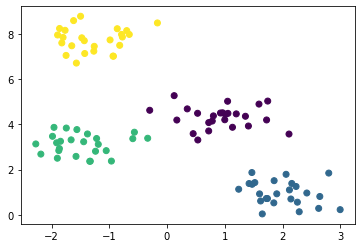

In [35]:
#生成随机样本数据
X, Y = make_blobs(centers=4, cluster_std=0.5, random_state=0)#使用库中的cluster生成随机的样本数据
plt.scatter(X[:,0], X[:,1],c=Y);#将数据显示出来，X是二维坐标[a,b],Y表示cluster的类别分别用0 1 2 表示。

In [36]:
#将k-Means应用于样本数据
model = KMeans(n_clusters=4,random_state=8)#实例化一个k-Means对象，集群数设置为4，并使用随机种子数值为8
model.fit(X)#将样本数据带入模型进行训练
y_kmeans = model.predict(X)#使用训练好的K-Means模型预测出Y的值并且赋值给y_kmeans

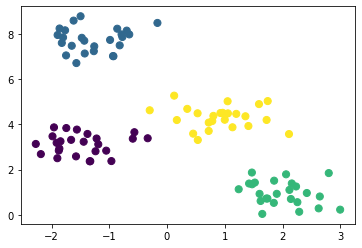

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') #将预测的结果显示出来

[[-1.47935679  3.11716896]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]]


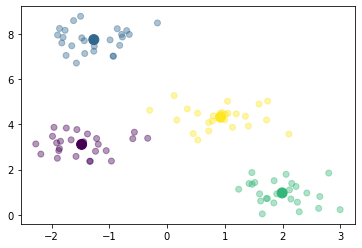

In [42]:
mu = model.cluster_centers_#将每个cluster的中心点显示出来
plt.scatter(X[:,0], X[:,1], c=y_kmeans, alpha=0.4)
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(y_kmeans))
print (mu)

#### K-Means 例子2

In [44]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Fetch MNIST dataset from OpenML
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)#X_digits 包含图像数据（特征），而 Y_digits 包含对应的标签（目标值）

# Convert data to numpy arrays and shuffle
X_digits, Y_digits = shuffle(X_digits, Y_digits, random_state=0)#由于 MNIST 数据集中的图像通常按数字顺序排列，打乱数据可以确保在取样时得到随机性。

# Optionally, select a subset of the data to shorten runtime
X_digits = X_digits[-5000:]
Y_digits = Y_digits[-5000:]

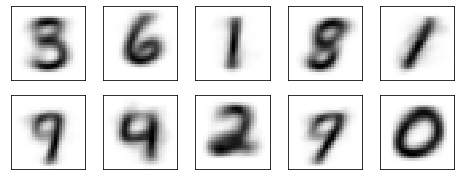

In [56]:
# 应用 K-means 聚类
kmeans = KMeans(n_clusters=10, random_state=0) #实例化模型
clusters = kmeans.fit_predict(X_digits) #训练并且把预测赋值给clusters

# 可视化中心点
fig, ax = plt.subplots(2, 5, figsize=(8, 3))#创建一个新的matplotlib图形和一组子图（ax）子图被组织成2行5列，整个图形的大小设为8x3英寸。
centers = kmeans.cluster_centers_.reshape(10, 28, 28)# 这行代码获取 K-means 算法计算出的中心点，并将它们从一维数组重塑为28x28像素的图像

#遍历和显示每个中心点
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

 Even though there are 10 digits, some of them are over/under-represented.

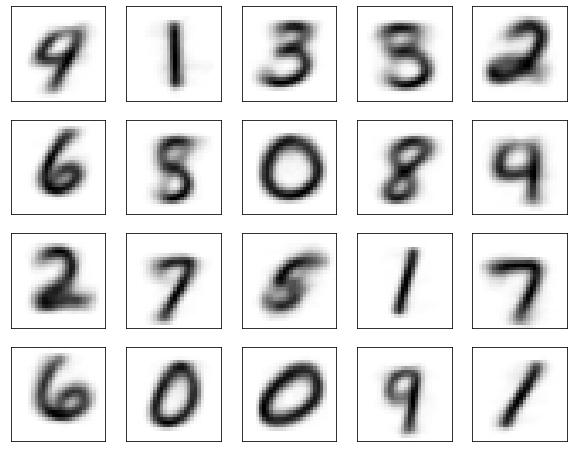

In [57]:
# 应用 K-means 聚类，集群数量设置为20
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(X_digits)

# 可视化中心点
fig, ax = plt.subplots(4, 5, figsize=(10, 8))  # 调整布局以容纳20个中心点
centers = kmeans.cluster_centers_.reshape(20, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)